In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

# Load Data
Loading the cleaned dataset
Trying different selected features from EDA feature selection methods

In [5]:
df = pd.read_csv("../../Data/cleaned_alzheimer.csv")

selected = {
	"chi2": df[["MMSE", "M/F", "EDUC", "SES"]],
	"f_classif": df[["MMSE", "M/F", "nWBV", "EDUC"]],
	"RandomForestClassifier": df[['MMSE', 'EDUC', 'eTIV', 'nWBV']]
}

# X = df.drop(columns=["CDR", "Group"])
X = selected["chi2"]
# X = selected["f_classif"]
# X = selected["RandomForestClassifier"]
X

,MMSE,M/F,EDUC,SES
0,27.0,0,14,2.0
1,30.0,0,14,2.0
2,28.0,1,18,3.0
3,27.0,1,18,3.0
4,28.0,0,12,4.0
...,...,...,...,...
312,28.0,0,16,1.0
313,26.0,0,16,1.0
314,30.0,1,13,2.0
315,30.0,1,13,2.0


## Dimensionality Reduction

In [6]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.06791717, -1.14624108, -0.2105024 , -0.48669294],
       [ 0.71026626, -1.14624108, -0.2105024 , -0.48669294],
       [ 0.19147731,  0.87241682,  1.15830296,  0.40510857],
       ...,
       [ 0.71026626,  0.87241682, -0.55270374, -0.48669294],
       [ 0.71026626,  0.87241682, -0.55270374, -0.48669294],
       [ 0.71026626,  0.87241682, -0.55270374, -0.48669294]])

## PCA

In [7]:
# Reduce demensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2']).reset_index(drop=True)
X_pca

,PC1,PC2
0,0.163704,-0.962012
1,0.376844,-0.480838
2,0.573452,0.709306
3,0.502405,0.548915
4,-1.438725,-0.478589
...,...,...
312,1.305727,-1.002251
313,1.163634,-1.323034
314,0.146856,1.103262
315,0.146856,1.103262


## TSNE

In [8]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2']).reset_index(drop=True)
X_tsne

,TSNE1,TSNE2
0,4.062042,-31.499046
1,4.152594,-35.030922
2,3.728844,14.379148
3,3.516383,12.947483
4,-12.610803,-30.036148
...,...,...
312,20.175344,-30.550144
313,19.552660,-28.314238
314,-9.390130,34.755264
315,-7.176409,32.241413


## Elbow Plot
To find optimal K value

In [9]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 58)
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_)

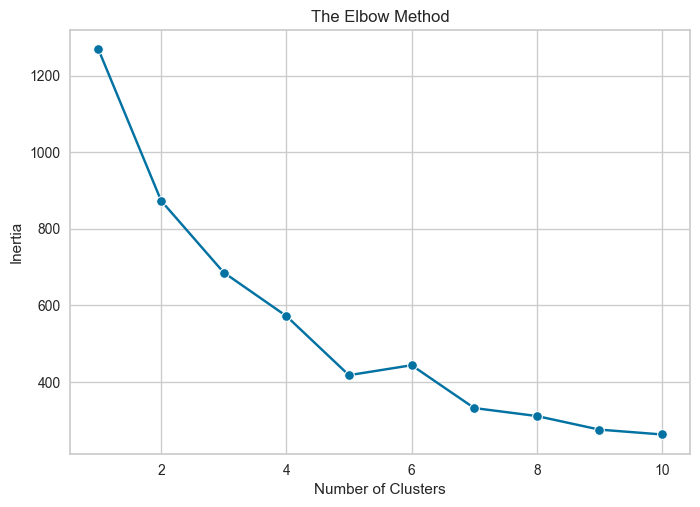

In [10]:
sns.lineplot(x = range(1, 11), y = wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)

Ideal Number of Clusters using elbow method: \
chi2: 5 \
f_classification: 3 \
RandomForest: 3

## Clusters Plot

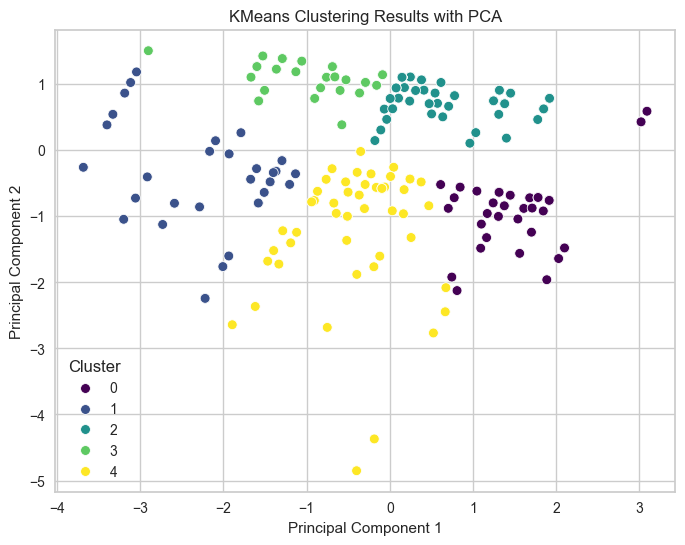

In [11]:
# Choose the number of clusters for KMeans (e.g., 2 or 3)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Convert to a Data Frame and store Cluster No
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).reset_index(drop=True)
X_scaled['cluster'] = clusters
# X_scaled["Group"] = df["Group"]
# X_pca["cluster"] = clusters

# Plot the PCA-transformed data with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca["PC1"], y=X_pca["PC2"], hue=clusters, palette='viridis', s=50)
# sns.scatterplot(x=X_tsne["TSNE1"], y=X_tsne["TSNE2"], hue=clusters, palette='viridis', s=50)
plt.title('KMeans Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


## Silhouette Score
Find out how good the clustering was

Silhouette Scores using different feature selections and ideal number of clusters: \
chi2: ~0.44 \
f_classification: ~0.38 \
RandomForest: ~0.33 

In [12]:
sil_score = silhouette_score(X_scaled, clusters)
sil_score

0.4483983844019428

## Silhouette Plots

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


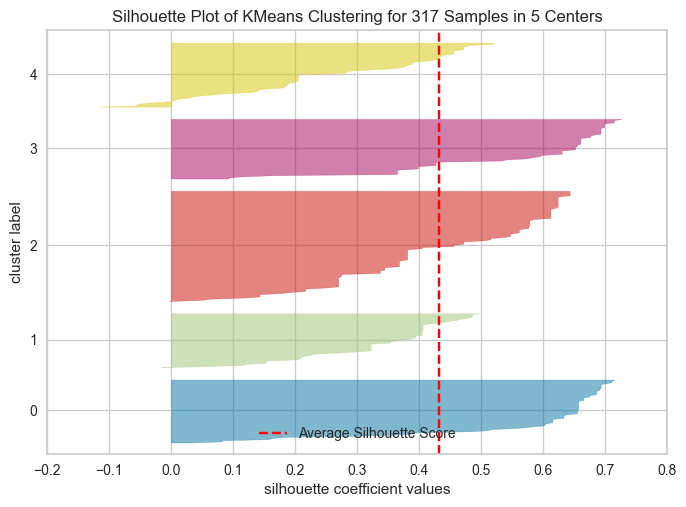

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 317 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca)
visualizer.show()

             MMSE       M/F      EDUC       SES     Group
cluster                                                  
0        0.241536 -1.004581  1.110275 -1.081227  0.385965
1       -0.586706 -0.569482 -1.258058  1.387910  0.653061
2        0.448252  0.872417  0.501553 -0.531733  0.121212
3        0.398032  0.872417 -0.787175  0.784950  0.296296
4       -0.877407 -0.833001 -0.151502  0.066839  0.775862


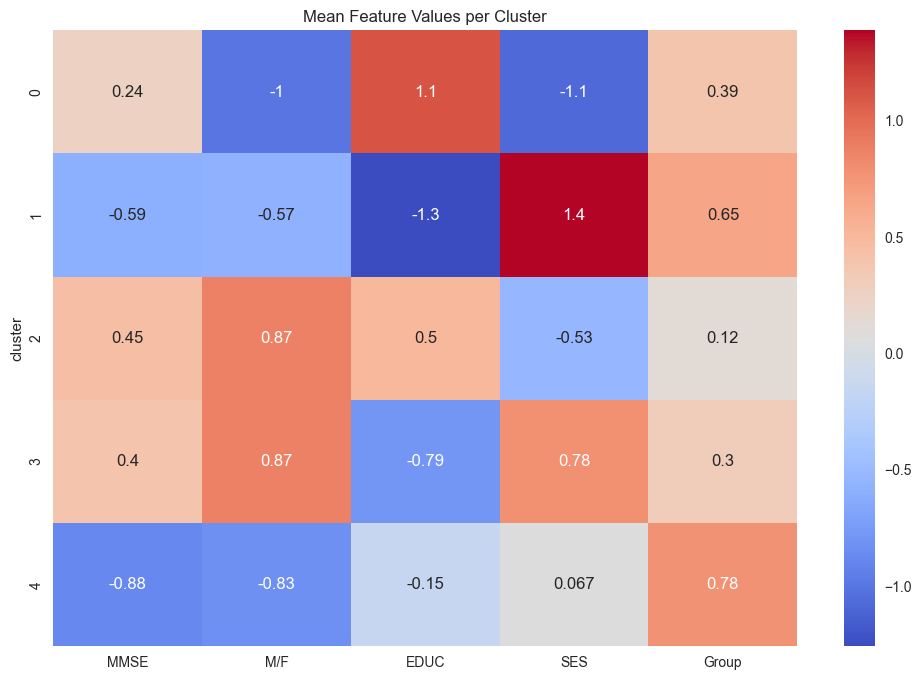

In [14]:
# Add group
X_scaled["Group"] = df["Group"]

cluster_means = X_scaled.groupby('cluster').mean()

# Display the mean feature values for each cluster
print(cluster_means) 

# Visualize the differences between clusters
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Mean Feature Values per Cluster')
plt.show()

## Observations:

### Cluster 0:
- Higher mean value for EDUC (1.1) and moderate positive values for MMSE and Group.
- Lower M/F and SES values.
- This cluster may represent individuals with higher educational levels but lower socioeconomic status (SES).

### Cluster 1:
- Strong negative values for MMSE and EDUC with high SES.
- Higher values for Group.
- This could indicate a group with lower cognitive scores (MMSE) and education levels but higher socioeconomic standing.

### Cluster 2:
- Higher values in MMSE, M/F, and EDUC, with lower SES.
- This cluster might consist of individuals with high cognitive scores, education, and more males/females but lower socioeconomic status.

### Cluster 3:
- Similar to Cluster 2 in M/F and moderate values in MMSE and SES.
- Slightly lower EDUC value compared to Cluster 2.
- This group is similar to Cluster 2 but with slightly less education.

### Cluster 4:
- Strong negative values across most features except for SES and Group.
- Likely represents individuals with lower scores in cognitive measures, education, and possibly lower male/female representation.


Index(['MMSE', 'M/F', 'EDUC', 'SES', 'cluster', 'Group'], dtype='object')


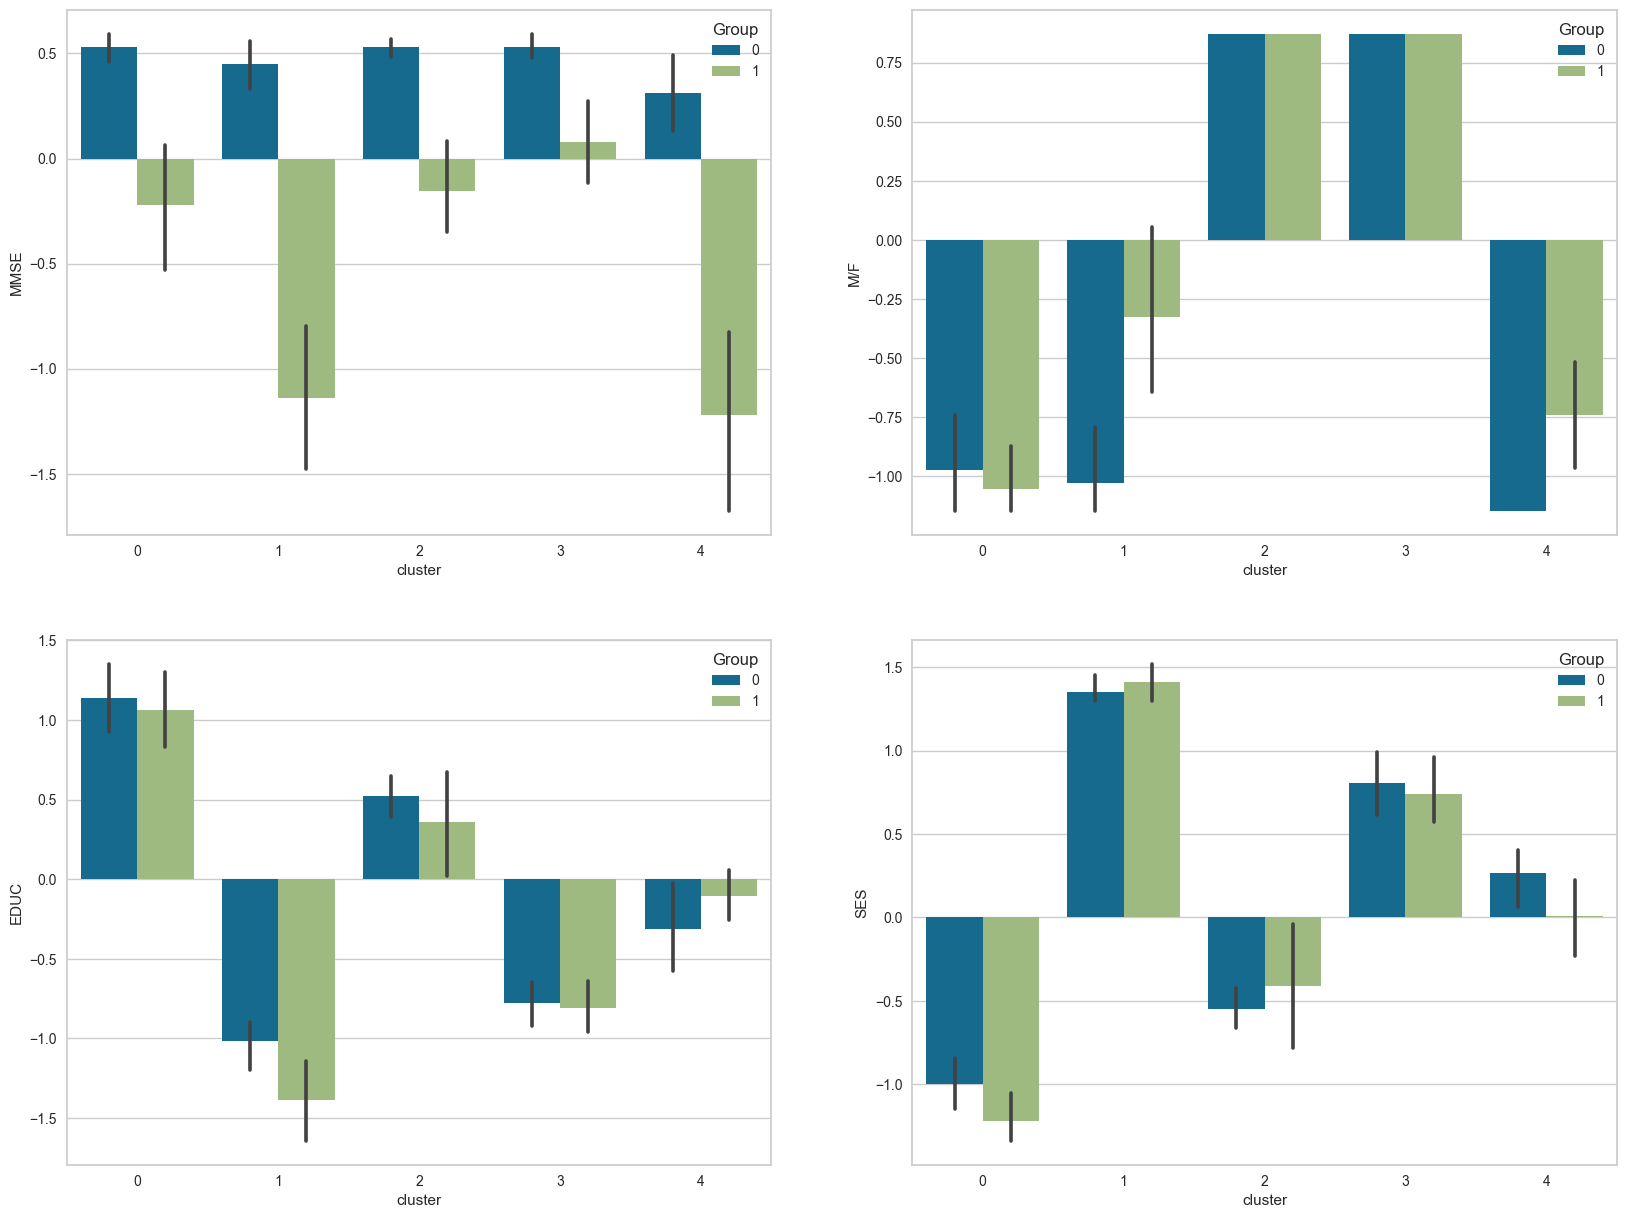

In [15]:
figure, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))
print(X_scaled.columns)
for i, column in enumerate(X_scaled.columns):
	if column == "cluster" or column == "Group":
		continue

	sns.barplot(x=X_scaled["cluster"], y=X_scaled[column], hue=X_scaled["Group"], ax=axs[i//2, i%2])